# Predicting different ratings in restaurant data

You can download the dataset from:

https://www.kaggle.com/uciml/restaurant-data-with-consumer-ratings

## Importing Required Libraries

In [1]:
# Basic ML Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
import io
import requests

# Model Creation Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Loading and creating the main dataset

In [2]:
url='https://www.kaggle.com/uciml/restaurant-data-with-consumer-ratings?select=chefmozhours4.csv'
s = requests.get(url).content
try:
    df = pd.read_csv(io.StringIO(s.decode('utf-8')))
except Exception as e:
    print(e)
    
try:
    df = pd.read_csv(url)
except Exception as e:
    print(e)

Error tokenizing data. C error: Expected 1 fields in line 7, saw 2

Error tokenizing data. C error: Expected 1 fields in line 7, saw 2



Having tried to import the dataset in a few different ways and being unable to load from the URL, I had to download the dataset.

In [3]:
PATH = './Data/restaurant/'
dfhrs = pd.read_csv(PATH+'/chefmozhours4.csv')
dfhrs.head()

,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;


In [4]:
dfacc = pd.read_csv(PATH+'chefmozaccepts.csv')
dfacc.head()

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


In [5]:
dfcui = pd.read_csv(PATH+'chefmozcuisine.csv')
dfcui['rcuisine'] = dfcui['Rcuisine']
dfcui = dfcui.drop(columns=['Rcuisine'])
dfcui.head()

,placeID,rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [6]:
dfpark = pd.read_csv(PATH+'chefmozparking.csv')
dfpark.head()

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


In [7]:
dfgeo = pd.read_csv(PATH+'geoplaces2.csv')
dfgeo.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [8]:
udfcu = pd.read_csv(PATH+'usercuisine.csv')
udfcu['ucuisine'] = udfcu['Rcuisine']
udfcu = udfcu.drop(columns=['Rcuisine'])
udfcu.head()

,userID,ucuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch


In [9]:
udfpay = pd.read_csv(PATH+'userpayment.csv')
udfpay.head()

,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards


In [10]:
udfpro = pd.read_csv(PATH+'userprofile.csv')
udfpro.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [11]:
dfrat = pd.read_csv(PATH+'rating_final.csv')
dfrat.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [12]:
df1 = pd.merge(dfhrs, dfacc, on='placeID', how='inner')
df2 = pd.merge(df1, dfcui, on='placeID', how='inner')
df3 = pd.merge(df2, dfpark, on='placeID', how='inner')
df_chef = pd.merge(df3, dfgeo, on='placeID', how='inner')
df_chef.head()

,placeID,hours,days,Rpayment,rcuisine,parking_lot,latitude,longitude,the_geom_meter,name,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,135109,08:00-21:00;,Mon;Tue;Wed;Thu;Fri;,cash,Italian,none,18.921785,-99.235350,0101000020957F0000A6BF695F136F5AC1DADF87B20556...,Paniroles,...,Wine-Beer,not permitted,informal,no_accessibility,medium,?,quiet,f,closed,Internet
1,135109,08:00-21:00;,Sat;,cash,Italian,none,18.921785,-99.235350,0101000020957F0000A6BF695F136F5AC1DADF87B20556...,Paniroles,...,Wine-Beer,not permitted,informal,no_accessibility,medium,?,quiet,f,closed,Internet
2,135109,08:00-21:00;,Sun;,cash,Italian,none,18.921785,-99.235350,0101000020957F0000A6BF695F136F5AC1DADF87B20556...,Paniroles,...,Wine-Beer,not permitted,informal,no_accessibility,medium,?,quiet,f,closed,Internet
3,135106,18:00-23:30;,Mon;Tue;Wed;Thu;Fri;,cash,Mexican,none,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
4,135106,18:00-23:30;,Mon;Tue;Wed;Thu;Fri;,VISA,Mexican,none,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none


In [13]:
udf1 = pd.merge(udfcu, udfpay, on='userID', how='inner')
df_user = pd.merge(udf1, udfpro, on='userID', how='inner')
df_user.head()

,userID,ucuisine,Upayment,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,...,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,American,cash,22.139997,-100.978803,false,abstemious,informal,family,on foot,...,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,Mexican,cash,22.150087,-100.983325,false,abstemious,informal,family,public,...,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,Mexican,cash,22.119847,-100.946527,false,social drinker,formal,family,public,...,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,Bakery,cash,18.867000,-99.183000,false,abstemious,informal,family,public,...,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1004,Bakery,bank_debit_cards,18.867000,-99.183000,false,abstemious,informal,family,public,...,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53


In [14]:
df1 = pd.merge(dfrat, df_user, on='userID', how='inner')
df = pd.merge(df1, df_chef, on='placeID', how='inner')
df

,userID,placeID,rating,food_rating,service_rating,ucuisine,Upayment,latitude_x,longitude_x,smoker,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,U1077,135085,2,2,2,Mexican,VISA,22.156469,-100.98554,false,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
1,U1077,135085,2,2,2,Mexican,VISA,22.156469,-100.98554,false,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
2,U1077,135085,2,2,2,Mexican,VISA,22.156469,-100.98554,false,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
3,U1077,135085,2,2,2,Mexican,cash,22.156469,-100.98554,false,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
4,U1077,135085,2,2,2,Mexican,cash,22.156469,-100.98554,false,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26404,U1086,132937,2,0,1,Italian,bank_debit_cards,22.157281,-100.98444,false,...,Full_Bar,section,informal,completely,low,?,quiet,f,closed,variety
26405,U1086,132937,2,0,1,Italian,bank_debit_cards,22.157281,-100.98444,false,...,Full_Bar,section,informal,completely,low,?,quiet,f,closed,variety
26406,U1086,132937,2,0,1,Italian,cash,22.157281,-100.98444,false,...,Full_Bar,section,informal,completely,low,?,quiet,f,closed,variety
26407,U1086,132937,2,0,1,Italian,cash,22.157281,-100.98444,false,...,Full_Bar,section,informal,completely,low,?,quiet,f,closed,variety


## Exploratory Data Analysis and Feature Engineering

It is true that most people analyse the entire data before engineering any features. But this dataset can have us engiineer some features along the way. Let's see how...

In [15]:
print(df.columns)

Index(['userID', 'placeID', 'rating', 'food_rating', 'service_rating',
       'ucuisine', 'Upayment', 'latitude_x', 'longitude_x', 'smoker',
       'drink_level', 'dress_preference', 'ambience', 'transport',
       'marital_status', 'hijos', 'birth_year', 'interest', 'personality',
       'religion', 'activity', 'color', 'weight', 'budget', 'height', 'hours',
       'days', 'Rpayment', 'rcuisine', 'parking_lot', 'latitude_y',
       'longitude_y', 'the_geom_meter', 'name', 'address', 'city', 'state',
       'country', 'fax', 'zip', 'alcohol', 'smoking_area', 'dress_code',
       'accessibility', 'price', 'url', 'Rambience', 'franchise', 'area',
       'other_services'],
      dtype='object')


In [16]:
df['fax'].unique()

array(['?'], dtype=object)

In [17]:
df['the_geom_meter'].unique()

array(['0101000020957F00009F823DA6094858C18A2D4D37F9A44B41',
       '0101000020957F00001AD016568C4858C1243261274BA54B41',
       '0101000020957F00004C95C918394758C17A5C44896AA34B41',
       '0101000020957F000087BEDDE8D24858C1B20CDB33DBA24B41',
       '0101000020957F00007CDF5EAFC58157C1645743B23E4F4941',
       '0101000020957F000027A30471EE8157C1AC17D61EC84E4941',
       '0101000020957F00008A20E615808157C16272FECBF84F4941',
       '0101000020957F0000F2F4110CF28157C1DCFD7C1BA04D4941',
       '0101000020957F00003AE4C6DBF48157C1CE38ECC1864E4941',
       '0101000020957F000048C65BA7EF8157C177F2344D664E4941',
       '0101000020957F0000FC60BDA8E88157C1B2C357D6DA4E4941',
       '0101000020957F00008EBA2D06DC8157C194E03B7B504E4941',
       '0101000020957F00005D67BCDDED8157C1222A2DC8D84D4941',
       '0101000020957F0000E14AD4DBC7765AC1F7B33C85B1534A41',
       '0101000020957F000000DD3546816E5AC119D4BD17FD544A41',
       '0101000020957F0000A15C8F5FF78057C1C93CEA9E0A4E4941',
       '0101000020957F00

In [18]:
df['city'].unique()

array(['San Luis Potosi', 's.l.p.', '?', 'Ciudad Victoria', 'Cd Victoria',
       'victoria', 'victoria ', 'Cuernavaca', 'cuernavaca',
       'san luis potosi', 'Cd. Victoria', 'Jiutepec', 'Soledad',
       'san luis potosi ', 'san luis potos', 's.l.p'], dtype=object)

In [19]:
df['state'].unique()

array(['SLP', 's.l.p.', '?', 'Tamaulipas', 'tamaulipas', 'Morelos',
       'morelos', 'san luis potosi', 'San Luis Potosi', 'S.L.P.', 'slp',
       'mexico', 'san luis potos'], dtype=object)

In [20]:
df['country'].unique()

array(['Mexico', 'mexico', '?'], dtype=object)

We can see that the same cities and states are being repeated mutiple times in certain places. We can also see that the only country is mexico. But, these columns are almost irrelevant and better to be dropped.

**Let's first drop all the irrelevant, less useful and less understandable columns to increase simplicity.**

In [21]:
df.drop(columns=['userID', 'placeID', 'fax', 'the_geom_meter', 'hours', 'zip', 'name', 'state', 'country', 'city'], inplace=True)

**Let us engineer Franchise, Accessiblity, Marital Status and Hijos (children)**

In [22]:
df['franchise'].unique()

array(['f', 't'], dtype=object)

In [23]:
df['accessibility'].unique()

array(['no_accessibility', 'completely', 'partially'], dtype=object)

In [24]:
df['hijos'].unique()

array(['kids', 'independent', '?', 'dependent'], dtype=object)

In [25]:
df['marital_status'].unique()

array(['married', 'single', 'widow', '?'], dtype=object)

In [26]:
fr = []
acc = []
hij = []
mar = []

for i in range(len(df['franchise'])):
    
    if df['franchise'][i] == 'f':
        fr.append(1)
    
    else:
        fr.append(0)
        
for i in range(len(df['accessibility'])):
        
    if df['accessibility'][i][0] == 'n':
        acc.append(-1)
    
    elif df['accessibility'][i][0] == 'p':
        acc.append(0)
        
    else:
        acc.append(1)
        
for i in range(len(df['marital_status'])):
    
    if df['marital_status'][i] == 'widow':
        mar.append(-1)
        
    elif df['marital_status'][i] == 'single':
        mar.append(1)
        
    elif df['marital_status'][i] == 'married':
        mar.append(2)
        
    else:
        mar.append(0)
        
for i in range(len(df['hijos'])):
    
    if df['hijos'][i][0] == 'k' or df['hijos'][i][0] == 'd':
        hij.append(-1)
        
    elif df['hijos'][i][0] == 'i':
        hij.append(1)
        
    else:
        hij.append(0)
    
df['Franchise'] = fr
df['Accessiblity'] = acc
df['Children'] = hij
df['Marital_status'] = mar
df['Franchise'].unique()

array([1, 0], dtype=int64)

In [27]:
df['Accessiblity'].unique()

array([-1,  1,  0], dtype=int64)

In [28]:
df['Children'].unique()

array([-1,  1,  0], dtype=int64)

In [29]:
df['Marital_status'].unique()

array([ 2,  1, -1,  0], dtype=int64)

In [30]:
df.drop(columns=['franchise', 'accessibility', 'hijos', 'marital_status'], inplace=True)

**Let us engineer the URLs and addresses**

In [31]:
df['url'].unique()

array(['?', 'www.cenidet.edu.mx', 'reyecito.com', 'sushi-itto.com.mx',
       'carlosandcharlies.com', 'eloceanodorado.com', 'lacantinaslp.com',
       'lunacafe.com.mx'], dtype=object)

In [32]:
df['address'].unique()

array(['Venustiano Carranza 719 Centro',
       'esquina santos degollado y leon guzman',
       'Ignacio Allende 785 Centro', 'Pascual M. Hernandez 240', '?',
       'Calle Mezquite Fracc Framboyanes', 'frente al tecnologico',
       'lic. Emilio portes gil', 'calle emilio portes gil',
       'Interior Internado Palmira SN', 'avenida salvador montiel ',
       'cd. mier', 'tampico', 'De La Estrella 2005 Estrella de Oriente',
       'av. seminario', 'Ricardo B. Anaya',
       'Ricardo B. Anaya 2700 Estrella de Oriente',
       'Zaragoza entre Francisco Zarco y Lopez Velarde',
       'Cordillera de Los Alpes 160 Lomas 2 Seccion',
       'Agricultura 595 del Valle',
       'Cordillera de Los Alpes 675 Loma Verde',
       'Venustiano Carranza 1809 C Polanco',
       'Venustiano Carranza 303 Centro', 'Av. de los Pintores',
       'Himno Nacional 100 Avenida', 'Himno Nacional 2104 Tangamanga',
       'Av. Carranza 830', 'Constitucion 200 Centro',
       'Lateral Salvador Nava Martinez 3145'

We can see that this dataset has URLs of a few restaurants. Now, the best thing to do woulld be make a feature which tells us whether a URL exists. Any more detail is almost irrelevant.

In [33]:
hasurl = []
hasadr = []

for i in range(len(df['url'])):
    hasurl.append(int(df['url'][i] != '?'))
    hasadr.append(int(df['address'][i] != '?'))
    
df['Has_url'] = hasurl
df['Has_url'].unique()

array([0, 1], dtype=int64)

In [34]:
df['Has_address'] = hasadr
df['Has_address'].unique()

array([1, 0], dtype=int64)

In [35]:
df = df.drop(columns=['url', 'address'])

**Let us engineer the payment method**

In [36]:
df['Upayment'].unique()

array(['VISA', 'cash', 'bank_debit_cards', 'MasterCard-Eurocard',
       'American_Express'], dtype=object)

In [37]:
df['Rpayment'].unique()

array(['cash', 'VISA', 'MasterCard-Eurocard', 'American_Express',
       'bank_debit_cards', 'Carte_Blanche'], dtype=object)

In [38]:
payment = []

for i in range(len(df['Rpayment'])):
    if df['Upayment'][i] == df['Rpayment'][i] or df['Upayment'][i] == 'cash':
        payment.append(1)
    else:
        payment.append(0)
        
df['Payment_comfort'] = payment
df['Payment_comfort'].unique()

array([0, 1], dtype=int64)

In [39]:
df = df.drop(columns=['Upayment', 'Rpayment'])

**Let us engineer the smoking columns**

In [40]:
df['smoker'].unique()

array(['false', 'true'], dtype=object)

In [41]:
df['smoking_area'].unique()

array(['not permitted', 'none', 'permitted', 'section', 'only at bar'],
      dtype=object)

Next we target the smoking column. Here, if the person is a smoker and the area has a smoking area or smoking is permitted, we set it to 1. If the person is not a smoker, we set it to 0 and if the person is a smoker but there is no smoking area, we set it to -1.

In [42]:
smkecomf = []

for i in range(len(df['smoker'])):
    
    if df['smoker'][i] == 'true':
        
        if df['smoking_area'][i] == 'section' or df['smoking_area'][i] == 'permitted' or df['smoking_area'][i] == 'only at bar':
            smkecomf.append(1)
        
        elif df['smoking_area'][i] == 'none':
            smkecomf.append(0)
        
        else:
            smkecomf.append(-1)
    
    else:
        smkecomf.append(0)
        
df['Smoke_comfort'] = smkecomf
df['Smoke_comfort'].unique()

array([ 0, -1,  1], dtype=int64)

In [43]:
df = df.drop(columns=['smoking_area', 'smoker'])

**Let us now engineer alcohol columns**

In [44]:
df['alcohol'].unique()

array(['No_Alcohol_Served', 'Wine-Beer', 'Full_Bar'], dtype=object)

In [45]:
df['drink_level'].unique()

array(['social drinker', 'abstemious', 'casual drinker'], dtype=object)

We can see that there are different levels of drinkers. We can say that casual drinkers are the highest drinkers followed by social drinkers and then by abstemious. A Full bar is most liked by a social drinker while no alcohol is liked by abstemious. We can engineer a feature for drinking comfort by dividing the drink level column with alcohol column.

In [46]:
drinkcomf = []

for i in range(len(df['alcohol'])):
    
    dl = 0
    al = 0
    
    if df['alcohol'][i][:2] == 'No':
        al = 1
    elif df['alcohol'][i][:2] == 'Wi':
        al = 2        
    elif df['alcohol'][i][:2] == 'Fu':
        al = 3
        
    if df['drink_level'][i][:2] == 'ab':
        dl = 1
    elif df['drink_level'][i][:2] == 'so':
        dl = 2
    elif df['drink_level'][i][:2] == 'ca':
        dl = 3
        
    com = dl-al
    
    if com < 0:
        com = -com
        
    drinkcomf.append(com)

df['Drink_comfort'] = drinkcomf
df['Drink_comfort'].unique()

array([1, 0, 2], dtype=int64)

In [47]:
df = df.drop(columns=['alcohol', 'drink_level'])

**Let us engineer area**

In [48]:
df['area'].unique()

array(['closed', 'open'], dtype=object)

In [49]:
ar = []

for i in range(len(df['area'])):
    
    if df['area'][i][0] == 'o':
        ar.append(1)
        
    else:
        ar.append(0)
        
df['Area_open'] = ar
df['Area_open'].unique()

array([0, 1], dtype=int64)

In [50]:
df = df.drop(columns=['area'])

**Let us now engineer the dress code**

In [51]:
df['dress_preference'].unique()

array(['elegant', 'informal', 'no preference', 'formal', '?'],
      dtype=object)

In [52]:
df['dress_code'].unique()

array(['informal', 'casual', 'formal'], dtype=object)

If the person has no real preference or their preference is unkown, we can say that they will be nuetral. Also, elegant means they are fine with casual and formal. Finally, if the person wants to wear formal or informal, they will be uncomfortable with teh other. Thus, an uncomfortable person will get a negative value.

In [53]:
dresscomf = []

for i in range(len(df['dress_code'])):
    
    if df['dress_preference'][i] == '?' or df['dress_preference'][i] == 'no preference':
        dresscomf.append(0)
        
    elif df['dress_preference'][i] == 'elegant':
        if df['dress_code'][i] == 'informal':
            dresscomf.append(0)
        else:
            dresscomf.append(1)

    elif df['dress_preference'][i] == df['dress_code'][i]:
        dresscomf.append(1)
            
    else:
        dresscomf.append(-1)

df['Dress_comfort'] = dresscomf
df['Dress_comfort'].unique()

array([ 0,  1, -1], dtype=int64)

In [54]:
df = df.drop(columns=['dress_preference', 'dress_code'])

**Let us now engineer transportation and parking**

In [55]:
df['transport'].unique()

array(['public', 'on foot', 'car owner', '?'], dtype=object)

In [56]:
df['parking_lot'].unique()

array(['public', 'none', 'yes', 'valet parking'], dtype=object)

If a person is on foot or uses public transport, they will be neutral to the presence or absence of a parking lot. But, if the person is a car owner, they would most prefer valet parking, followed by a parking lot. They would be neitral towrds public parking and will feel bad about not having a parking lot.

In [57]:
parkcomf = []

for i in range(len(df['transport'])):
    
    if df['transport'][i] == 'public' or df['transport'][i] == '?' or df['transport'][i] == 'on foot':
        parkcomf.append(0)
        
    elif df['transport'][i] == 'car owner':
        
        if df['parking_lot'][i] == 'none':
            parkcomf.append(-1)
        
        elif df['parking_lot'][i] == 'public':
            parkcomf.append(0)
            
        elif df['parking_lot'][i] == 'yes':
            parkcomf.append(1)
            
        elif df['parking_lot'][i] == 'valet parking':
            parkcomf.append(2)

df['Parking_comfort'] = parkcomf
df['Parking_comfort'].unique()

array([ 0, -1,  1,  2], dtype=int64)

In [58]:
df = df.drop(columns=['parking_lot', 'transport'])

**Let us now engineer ambience**

In [59]:
df['ambience'].unique()

array(['family', 'solitary', 'friends', '?'], dtype=object)

In [60]:
df['Rambience'].unique()

array(['familiar', 'quiet'], dtype=object)

In [61]:
ambcomf = []

for i in range(len(df['Rambience'])):
    
    if df['ambience'][i] == '?':
        ambcomf.append(0)
    
    elif df['ambience'][i] == 'family' or df['ambience'][i] == 'friends':
        
        if df['Rambience'][i] == 'familiar':
            ambcomf.append(1)
            
        elif df['Rambience'][i] == 'quiet':
            ambcomf.append(-1)
            
    elif df['ambience'][i] == 'solitary':
        
        if df['Rambience'][i] == 'familiar':
            ambcomf.append(-1)
            
        elif df['Rambience'][i] == 'quiet':
            ambcomf.append(1)
            
df['Ambience_comfort'] = ambcomf
df['Ambience_comfort'].unique()

array([ 1, -1,  0], dtype=int64)

In [62]:
df = df.drop(columns=['ambience', 'Rambience'])

**Let us engineer distance**

In [63]:
df['latitude_x'].unique()

array([22.156469, 22.143524, 22.207749, 22.139997, 22.168997, 22.149654,
       18.927072, 22.118464, 22.15    , 22.121857, 22.160572, 22.172524,
       22.137343, 22.149005, 22.156724, 22.156247, 22.174624, 22.195826,
       22.170396, 22.169184, 22.125365, 22.303308, 22.182571, 22.144415,
       22.162562, 22.16515 , 22.151796, 22.157281, 22.144803, 22.158473,
       18.988278, 22.150087, 22.143289, 22.175833, 22.154339, 22.177726,
       22.159427, 22.196787, 22.119847, 22.154677, 22.140388, 22.196624,
       22.139511, 22.19204 , 22.146708, 18.867   , 22.172109, 22.184862,
       22.150683, 22.187236, 22.150891, 23.752269, 23.752265, 23.753112,
       23.745096, 23.752874, 23.753336, 23.752943, 23.715238, 23.730569,
       23.758815, 23.753061, 23.77103 , 23.742409, 23.743793, 23.753237,
       18.95298 , 18.844818, 18.86826 , 18.875641, 18.878189, 18.877719,
       18.952615, 18.879729, 18.940062, 18.96479 , 18.917   , 18.925773,
       18.935191, 23.724972, 22.12676 , 22.137072, 

In [64]:
df['longitude_x'].unique()

array([-100.98554 , -100.987562, -100.942383, -100.978803, -100.974376,
       -100.99861 ,  -99.173584, -100.938256, -100.983   , -100.904279,
       -100.989418, -101.005758, -100.913935, -100.978153, -100.984268,
       -100.977402, -100.993873, -101.006317, -100.949936, -100.986843,
       -100.947888, -101.05468 , -100.963232, -100.933097, -100.99313 ,
       -100.987015, -100.989075, -100.98444 , -100.944623,  -99.097023,
       -100.983325, -100.987683, -100.986671, -100.975342, -101.014094,
       -100.990448, -100.936335, -100.946527, -100.949013, -100.937321,
       -100.91217 , -100.957002, -100.956935, -100.964355,  -99.183   ,
       -100.963199, -100.970535, -100.994213, -100.974891,  -99.168605,
        -99.16859 ,  -99.168567,  -99.164357,  -99.169242,  -99.167984,
        -99.166589,  -99.158864,  -99.171883,  -99.171216,  -99.166095,
        -99.167082,  -99.171889,  -99.163397,  -99.166868,  -99.260789,
        -99.182758,  -99.212033,  -99.220737,  -99.222969,  -99.

In [65]:
df['latitude_y'].unique()

array([22.150802 , 22.1473922, 22.156883 , 22.147145 , 23.7529821,
       23.7521965, 23.7543569, 23.7527071, 23.7521677, 23.7523648,
       23.7523041, 23.7529035, 23.7526973, 18.8760113, 18.9257734,
       23.7588052, 23.7602683, 23.7324226, 23.7318602, 22.126375 ,
       22.1262926, 22.1412198, 22.1430781, 22.140626 , 22.1412384,
       22.136872 , 23.7375834, 23.7292162, 22.140517 , 22.1489337,
       22.141282 , 22.1416471, 22.135011 , 22.149192 , 22.149689 ,
       22.153324 , 22.141848 , 22.139573 , 22.146658 , 22.152481 ,
       22.141421 , 22.165587 , 18.948657 , 18.859803 , 18.8820871,
       18.9217848, 18.933537 , 18.9101777, 18.8699929, 22.14955  ,
       22.1497088, 22.142017 , 22.1477379, 22.159357 , 22.178931 ,
       22.145992 , 22.140129 , 22.150981 , 22.185756 , 22.145893 ,
       22.14788  , 22.145108 , 22.156376 , 22.148854 , 22.15106  ,
       22.1513782, 22.156469 , 22.1506429, 22.147175 , 22.1422732,
       22.1603808, 22.147622 , 22.1449787, 22.1378633, 22.1312

In [66]:
df['longitude_y'].unique()

array([-100.98268  , -100.983092 , -100.978485 , -100.974494 ,
        -99.1684341,  -99.1666317,  -99.171288 ,  -99.1625655,
        -99.165709 ,  -99.1652879,  -99.1669133,  -99.165076 ,
        -99.1633594,  -99.2198896,  -99.2326355,  -99.1651297,
        -99.1658646,  -99.1586602,  -99.1504365, -100.910926 ,
       -100.9007764, -100.9313107, -100.9354788, -100.915657 ,
       -100.9239252, -100.9345736,  -99.1351318,  -99.1323571,
       -101.021422 , -101.019845 , -101.002958 , -100.9927118,
       -101.0286   , -101.002936 , -100.999525 , -101.0195459,
       -100.997475 , -100.991564 , -100.987219 , -100.973486 ,
       -101.013955 , -101.001273 ,  -99.235361 ,  -99.222164 ,
        -99.1630268,  -99.2353499,  -99.222497 ,  -99.2315438,
        -99.2103195, -100.97797  , -100.9760928, -100.999246 ,
       -100.9906163, -100.973411 , -101.012861 , -100.955118 ,
       -100.944872 , -100.977412 , -100.944518 , -100.97487  ,
       -100.989472 , -100.989547 , -100.998355 , -101.0

We need a function to calculate distance between any two points given as latitudes and longitudes.

In [67]:
from math import radians, cos, sin, asin, sqrt

def distance(lat1, lat2, lon1, lon2):
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    return(2 * asin(sqrt(sin((lat2 - lat1) / 2)**2 + cos(lat1) * cos(lat2) * sin((lon2 - lon1) / 2)**2)) * 6371)

In [68]:
dist = []

for i in range(len(df['latitude_x'])):
    dist.append(distance(df['latitude_x'][i], df['latitude_y'][i], df['longitude_x'][i], df['longitude_y'][i]))
    
df['Distance'] = dist
df['Distance'].unique()

array([6.95580631e-01, 9.52752712e-01, 7.57056441e+00, 1.26607652e+00,
       2.19649729e+00, 1.64556656e+00, 4.04928214e+02, 5.81950999e+00,
       9.50730907e-02, 8.69297974e+00, 1.28907742e+00, 3.38853370e+00,
       7.23669767e+00, 5.07245175e-01, 6.78500812e-01, 8.13655896e-01,
       2.88880491e+00, 5.56673290e+00, 4.01464969e+00, 2.08846090e+00,
       4.56525990e+00, 1.85066162e+01, 4.06074841e+00, 5.15572674e+00,
       1.69355266e+00, 1.65670783e+00, 6.67816909e-01, 7.42883255e-01,
       3.97586151e+00, 8.68512583e-01, 4.02721787e+02, 1.03602902e-01,
       1.04030551e+00, 6.57071852e-01, 3.18387727e+00, 7.91285187e+00,
       9.33447650e-01, 2.56455430e+00, 1.61786371e+00, 2.90128889e-01,
       1.60380987e+00, 1.11073543e+00, 4.64428737e+00, 5.39355280e-01,
       1.04469298e+00, 1.53776135e+00, 5.89271601e+00, 4.26632712e+00,
       7.30398798e+00, 1.88380569e+01, 4.41407071e+00, 4.85445113e+00,
       3.60199100e+00, 7.87063329e-01, 3.97243041e+00, 4.77800551e+00,
      

In [69]:
df = df.drop(columns=['latitude_x', 'latitude_y', 'longitude_x', 'longitude_y'])

**Let us now engineer budget**

In [70]:
df['budget'].unique()

array(['medium', 'low', '?', 'high'], dtype=object)

In [71]:
df['price'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [72]:
budgecomf = []

for i in range(len(df['budget'])):
    b = 0
    p = 0
    
    if df['budget'][i][0] == 'l':
        b = 1
        
    elif df['budget'][i][0] == 'm':
        b = 2
        
    elif df['budget'][i][0] == 'h':
        b = 3
        
    else:
        b = 1
        
    if df['price'][i][0] == 'l':
        p = 1
        
    elif df['price'][i][0] == 'm':
        p = 2
        
    elif df['price'][i][0] == 'h':
        p = 3
        
    budgecomf.append(b-p)
    
df['Budget_comfort'] = budgecomf
df['Budget_comfort'].unique()

array([ 0, -1,  1,  2, -2], dtype=int64)

In [73]:
df = df.drop(columns=['budget', 'price'])

**Let's Explore the rest of the columns to identify what can be done with them**

In [74]:
df.columns

Index(['rating', 'food_rating', 'service_rating', 'ucuisine', 'birth_year',
       'interest', 'personality', 'religion', 'activity', 'color', 'weight',
       'height', 'days', 'rcuisine', 'other_services', 'Franchise',
       'Accessiblity', 'Children', 'Marital_status', 'Has_url', 'Has_address',
       'Payment_comfort', 'Smoke_comfort', 'Drink_comfort', 'Area_open',
       'Dress_comfort', 'Parking_comfort', 'Ambience_comfort', 'Distance',
       'Budget_comfort'],
      dtype='object')

In [75]:
df['birth_year'] = 2021 - df['birth_year']

In [76]:
df['interest'].unique()

array(['technology', 'variety', 'none', 'eco-friendly', 'retro'],
      dtype=object)

In [77]:
df['personality'].unique()

array(['thrifty-protector', 'hard-worker', 'hunter-ostentatious',
       'conformist'], dtype=object)

In [78]:
df['religion'].unique()

array(['Catholic', 'none', 'Mormon', 'Christian', 'Jewish'], dtype=object)

In [79]:
df['activity'].unique()

array(['student', 'professional', '?', 'unemployed', 'working-class'],
      dtype=object)

In [80]:
df['color'].unique()

array(['blue', 'green', 'black', 'yellow', 'purple', 'red', 'orange',
       'white'], dtype=object)

In [81]:
df['days'].unique()

array(['Mon;Tue;Wed;Thu;Fri;', 'Sat;', 'Sun;'], dtype=object)

In [82]:
df['other_services'].unique()

array(['none', 'variety', 'Internet'], dtype=object)

In [83]:
df = pd.get_dummies(df, columns=['interest', 'personality', 'religion', 'activity', 'color', 'days', 'other_services', 'rcuisine', 'ucuisine'] )
df

,rating,food_rating,service_rating,birth_year,weight,height,Franchise,Accessiblity,Children,Marital_status,...,ucuisine_Swiss,ucuisine_Tapas,ucuisine_Tea_House,ucuisine_Tex-Mex,ucuisine_Thai,ucuisine_Tibetan,ucuisine_Tunisian,ucuisine_Turkish,ucuisine_Vegetarian,ucuisine_Vietnamese
0,2,2,2,34,65,1.71,1,-1,-1,2,...,0,0,0,0,0,0,0,0,0,0
1,2,2,2,34,65,1.71,1,-1,-1,2,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,34,65,1.71,1,-1,-1,2,...,0,0,0,0,0,0,0,0,0,0
3,2,2,2,34,65,1.71,1,-1,-1,2,...,0,0,0,0,0,0,0,0,0,0
4,2,2,2,34,65,1.71,1,-1,-1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26404,2,0,1,30,49,1.59,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
26405,2,0,1,30,49,1.59,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
26406,2,0,1,30,49,1.59,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
26407,2,0,1,30,49,1.59,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


All the columns we have are now in numerical form. Thus, we can apply any regression model on the dataset.

In [84]:
for i in df.dtypes:
    print(i)

int64
int64
int64
int64
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
int64
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8


In [85]:
x_col = df.drop(columns = ['rating', 'food_rating', 'service_rating'])
y_col = df[['rating', 'food_rating', 'service_rating']]

### Normalisation

In [86]:
mms = MinMaxScaler()
x_norm = mms.fit_transform(x_col)

## Model Creation and Evauation

Looking at the dataset, we can say very clearly that different columns will bear a different amount of impact on the given output columns. A linear regression model is unable to identify the "weights" which the "x-values" will need to work properly. Thus, it is most preferred to go ahead with a Multilayer perceptron, which can successfully identify the "weights" of all the "x-values" and give us a more successful prediction.

### Linear Regression (Just out of curiosity)

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_col, random_state=0)

In [88]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [89]:
predict = lm.predict(x_test)
predict

array([[-0.19488525,  0.13981628, -0.34259033],
       [ 1.71124268,  1.32957077,  1.30285645],
       [ 0.8230896 ,  0.89165878,  1.06036377],
       ...,
       [-0.22290039, -0.07970428, -0.06054688],
       [ 1.40621948,  0.96695328,  0.77850342],
       [ 0.07614136,  0.06235504,  0.128479  ]])

Since there are 3 values which are being predicted, we can see a list of size [n X 3]

In [90]:
mean_squared_error(y_test, predict)

0.21487455500192376

In [91]:
mean_absolute_error(y_test, predict)

0.31865464458497345

In [92]:
r2_score(y_test, predict)

0.7023133648353234

### Using a multi-layer perceptron

In [93]:
mlp = MLPRegressor(max_iter=200, activation='relu', verbose=2, learning_rate = 'invscaling', random_state=0)
mlp.fit(x_train,y_train)

Iteration 1, loss = 0.18565922
Iteration 2, loss = 0.10255436
Iteration 3, loss = 0.08530957
Iteration 4, loss = 0.07286189
Iteration 5, loss = 0.06538430
Iteration 6, loss = 0.05729591
Iteration 7, loss = 0.05161547
Iteration 8, loss = 0.04756421
Iteration 9, loss = 0.04355669
Iteration 10, loss = 0.03998650
Iteration 11, loss = 0.03741529
Iteration 12, loss = 0.03475800
Iteration 13, loss = 0.03318035
Iteration 14, loss = 0.03112085
Iteration 15, loss = 0.02943807
Iteration 16, loss = 0.02845867
Iteration 17, loss = 0.02725807
Iteration 18, loss = 0.02563680
Iteration 19, loss = 0.02490913
Iteration 20, loss = 0.02350601
Iteration 21, loss = 0.02262724
Iteration 22, loss = 0.02203855
Iteration 23, loss = 0.02116777
Iteration 24, loss = 0.02183663
Iteration 25, loss = 0.01954482
Iteration 26, loss = 0.01895268
Iteration 27, loss = 0.01856479
Iteration 28, loss = 0.01767245
Iteration 29, loss = 0.01724479
Iteration 30, loss = 0.01661784
Iteration 31, loss = 0.01637199
Iteration 32, los

MLPRegressor(learning_rate='invscaling', random_state=0, verbose=2)

In [94]:
mlpredict = mlp.predict(x_test)

In [95]:
mean_squared_error(y_test, mlpredict)

0.014892577915570067

In [96]:
mean_absolute_error(y_test, mlpredict)

0.05602829082445484

In [97]:
r2_score(y_test, mlpredict)

0.9793407608180682

As is clearly visible, the MAE and MSE for this are much lesser than they were in case of linear regression. The high r2 score suggests that the model has fit very well for the given data. Although, it may even cause overfitting and so, we should test the model with some other data as well. 

### Trying out different values of max_iter to see where the model flatlines

In [98]:
iterArray = range(10,151,20)
r2Array = []
runs = 5

for i in iterArray:
    
    r2Avg = 0
    mlpr = MLPRegressor(max_iter=i, activation='relu', learning_rate = 'invscaling')
    print(f'\n\nMaximum iterations {i}:\n')
    
    for j in range(runs):
        
        print(f'\nRun number {j+1}:\n')
        mlpr.fit(x_train,y_train)
        pred = mlpr.predict(x_test)
        r2Avg += r2_score(y_test, pred)
        
    r2Avg /= runs
    r2Array.append(r2Avg)



Maximum iterations 10:


Run number 1:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 2:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 3:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 4:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 5:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(




Maximum iterations 30:


Run number 1:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 2:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 3:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 4:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 5:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(




Maximum iterations 50:


Run number 1:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 2:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 3:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 4:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 5:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(




Maximum iterations 70:


Run number 1:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 2:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 3:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 4:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 5:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(




Maximum iterations 90:


Run number 1:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 2:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 3:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 4:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 5:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  warnings.warn(




Maximum iterations 110:


Run number 1:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 2:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 3:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 4:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(



Run number 5:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(




Maximum iterations 130:


Run number 1:


Run number 2:


Run number 3:


Run number 4:


Run number 5:



C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(




Maximum iterations 150:


Run number 1:


Run number 2:


Run number 3:


Run number 4:


Run number 5:



The verbose suggests that there is a possiblity for the model to not converge even at 130.

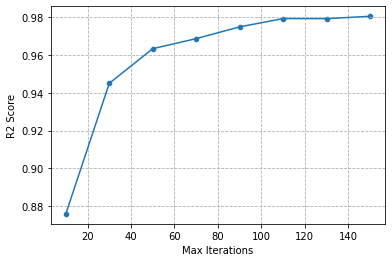

In [99]:
sns.scatterplot(x=iterArray,y=r2Array)
sns.lineplot(x=iterArray,y=r2Array)

plt.xlabel('Max Iterations')
plt.ylabel('R2 Score')
plt.grid(linestyle='--')

The best R2 score the model can achieve flatlines at max iter 110. The model usually converges by then although as seen above, there is a chance for it to not converge completely.

## Trying out different Test and Train ratios

In [100]:
mae = []
mse = []
r2 = []

In [101]:
mlp = MLPRegressor(max_iter=500, activation='relu', learning_rate = 'invscaling', random_state=0)

### Ratios 80:20, 75:25 and 70:30

In [102]:
test_sizes = [0.2, 0.25, 0.3]

In [103]:
for size in test_sizes:
    
    x_train, x_test, y_train, y_test = train_test_split(x_norm, y_col, test_size = size, random_state=0)
    
    mlp.fit(x_train,y_train)
    
    prd = mlp.predict(x_test)
    
    mse.append(mean_squared_error(y_test, prd))
    mae.append(mean_absolute_error(y_test, prd))
    r2.append(r2_score(y_test, prd))

### 100:100 (Full data as both, test and train)

In [104]:
x_train = x_norm
x_test = x_norm
y_train = y_col
y_test = y_col
    
mlp.fit(x_train,y_train)
    
prd = mlp.predict(x_test)
  
mse.append(mean_squared_error(y_test, prd))
mae.append(mean_absolute_error(y_test, prd))
r2.append(r2_score(y_test, prd))

In [105]:
test_sizes.append(1)

### Plotting the Mean Squared Error

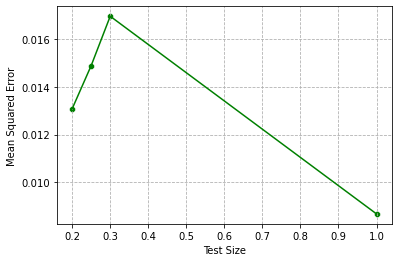

In [106]:
sns.scatterplot(x = test_sizes, y = mse, color = 'green')
sns.lineplot(x = test_sizes, y = mse, color = 'green')

plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.grid(linestyle='--')

We can see that the error is least when the entire data is used for training and testing. This means that the model fits its own data most well.

### Plotting the Mean Absolute Error

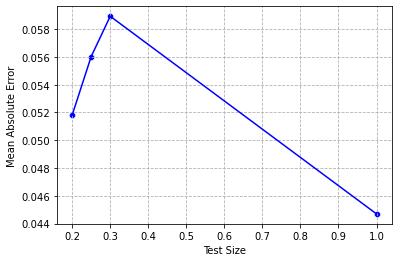

In [107]:
sns.scatterplot(x = test_sizes, y = mae, color = 'blue')
sns.lineplot(x = test_sizes, y = mae, color = 'blue')

plt.xlabel('Test Size')
plt.ylabel('Mean Absolute Error')
plt.grid(linestyle='--')

As with MSE, MAE also sees a very similar trend. As mentioned earlier, the model best fits its own data.

### Plotting the R2 Score

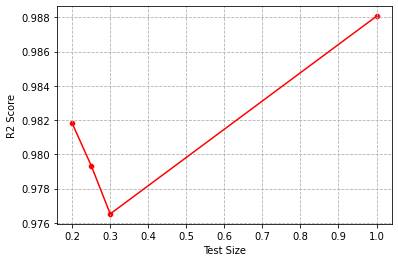

In [108]:
sns.scatterplot(x = test_sizes, y = r2, color = 'red')
sns.lineplot(x = test_sizes, y = r2, color = 'red')

plt.xlabel('Test Size')
plt.ylabel('R2 Score')
plt.grid(linestyle='--')

The R2 score acts as a mirror image of the MSE and MAE when the mirror is placed horizontally. It shows the same thing again, the model best fits the entirety of its own data.